# Đồ án cuối kì (Lập trình cho Khoa học dữ liệu)

Giao vien
Thông tin nhóm:
1. Nguyễn Văn Hậu (1712258)
2. Hà Thị Ngọc Thăm (1712160)

Phân công công việc: https://docs.google.com/spreadsheets/d/1yk7EGQSebSC8R5h_UnNOg1wxUU1y9y6lNY5y9waDXA4/edit?usp=sharing

Github: 

In [1]:
import numpy as np
import pandas as pd
import datetime
import re
import matplotlib.pyplot as plt

Để dữ liệu được quan sát đầy đủ hơn, em set chiều dài cột rộng hơn một chút.

In [2]:
pd.set_option('max_colwidth', 150)

# Thu thập dữ liệu:

- Tên tập dữ liệu: **"Medium 2021 data science articles dataset"**
- Mô tả về dữ liệu:
    - RAW: "Data about 45k+ data science articles published on medium in 2021."
    - Vietsub: Dữ liệu khoảng trên 45 ngàn dòng về các bài báo khoa học trên Medium vào năm 2021.
    - Tập dữ liệu tập trung vào các lĩnh vực:  Data Science, Machine Learning, Artificial Inteligence, Deep Learning, Data, Big Data, Analytics.
- Tác giả: Vinicius Lambert
- Nguồn dataset: [Kaggle](https://www.kaggle.com/viniciuslambert/medium-2021-data-science-articles-dataset)
- License: **[CC0: Public Domain](https://creativecommons.org/publicdomain/zero/1.0/)** (No Copyright)
- Tác giả thu thập data bằng cách parser HTML, được trình bày cách thu thập tại [file notebook](https://github.com/viniciusLambert/medium-scraping/blob/main/scrap.ipynb) này.

# Khám phá dữ liệu:

Thử xem những dòng đầu tiên của data có hình dạng ra sao.

In [3]:
medium_data = pd.read_csv(
    "Data/medium-data-science-articles-2021.csv", 
    encoding='utf-8'
)

medium_data.head()

,url,title,author,author_page,subtitle,claps,responses,reading_time,tag,date
0,https://medium.com/@dharmeshpanchmatia/data-analytics-and-ai-ml-platform-for-ecommerce-68639df89c7f,Data Analytics and AI/ML platform for eCommerce,dharmeshpanchmatia,https://medium.com/@dharmeshpanchmatia,Improve user pr,30.0,0.0,5.0,Big Data,2021-01-01
1,https://medium.com/predict/the-journey-from-an-apple-silicon-m1-powered-laptop-to-an-amd-ryzen-threadripper-3-desktop-6315252ac9d1,The journey from an Apple Silicon M1 powered laptop to an AMD Ryzen Threadripper 3 desktop.,dimitrisv,https://medium.com/@dimitrisv,NaN,42.0,0.0,5.0,Big Data,2021-01-01
2,https://medium.com/@rajsaraogi/demystifying-kpis-in-analytics-60084292412c,Demystifying KPIs in Analytics,rajsaraogi,https://medium.com/@rajsaraogi,NaN,19.0,0.0,3.0,Big Data,2021-01-01
3,https://medium.com/@bigdataschool/%D0%B1%D0%BE%D0%BB%D1%8C%D1%88%D0%B0%D1%8F-%D1%80%D0%B0%D0%B7%D0%BD%D0%B8%D1%86%D0%B0-%D1%87%D0%B5%D0%BC-%D1%81%...,Большая разница: чем структурированная потоковая передача в Apache Spark отличается от Spark Streaming,bigdataschool,https://medium.com/@bigdataschool,NaN,0.0,0.0,6.0,Big Data,2021-01-01
4,https://medium.com/@arnowa-44509/iot-a-new-way-of-life-249f69134af9,IoT: A New Way of Life,arnowa-44509,https://medium.com/@arnowa-44509,"IoT is more than just the Internet of things, it’s a network of new…",0.0,0.0,3.0,Big Data,2021-01-01


## Dữ liệu có bao nhiêu dòng và bao nhiêu cột?

- `num_cols` la
- `num_rows` la

In [4]:
# num_cols, num_rows = data.shape
# print(num_cols)
# print(num_rows)

Đúng theo mô tả về datâ của tác giả.

## Mỗi dòng có ý nghĩa gì? Các dòng có ý nghĩa khác nhau không?

## Dữ liệu có các dòng bị lặp không?

## Ý nghĩa mỗi cột?

## Kiểu dữ liệu của cột:

Mỗi cột hiện đang thuộc kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp đề có thể xử lý tiếp không? Để trả lời câu hỏi này, trước hết ta kiểm tra xem kiểu dữ liệu của mỗi cột hiện tại là gì?

In [5]:
medium_data.dtypes

url              object
title            object
author           object
author_page      object
subtitle         object
claps           float64
responses       float64
reading_time    float64
tag              object
date             object
dtype: object

Theo như mô tả bên trên, kiểu dữ liệu của các cột `url`, `title`, `author`, `author_page`, `subtitle`, `tag`, `date` là **object** và kiểu dữ liệu của các cột `claps`, `responses`, `reading_time` là **float64**. Ở đây, ta cần xử lý hai công việc cho xử lsy kiểu dữ liệu:
1. Kiểu dữ liệu của cột `date` đang là object, ta cần chuyển về dạng datetime để thuận tiện cho tính toán về sau.
2. Kiểu dữ liệu của cột `reading_time` đang là float64, ta cần chuyền về đúng kiểu là timedelta.

### Xem xét kiểu dữ liệu của cột `reading_time` 

Hiện tại, cột `reading_time` mang ý nghĩa biểu thị thời gian đọc của một bài viết. Đây là con số đo lường khoảng thời gian được tính bằng đơn vị phút. Em có thể chuyển về kiểu timedelta bằng phương thức **pd.to_timedelta()** với tham số **unit** là "m" tương ứng với số phút. Thế nhưng, giới hạn bên trong bài trình bày bên dưới chỉ sử dụng đơn vị phút, và nếu như chuyển sang kiểu dữ liệu này, việc lấy thông tin số phút trở nên dài dòng không cần thiết. Trong ngữ cảnh này, em xin phép được giữ nguyên cột `reading_time` kiểu dữ liệu là **float64**.

### Chuyển kiểu dữ liệu của cột `date` về **datetime**

Chuyển về dạng datetime bằng phương thức **pd.to_datetime()** với tham số **format** là "%Y-%m-%d" tương ứng "2021-01-01".

In [6]:
medium_data.date = pd.to_datetime(
    medium_data.date, 
    format="%Y-%m-%d"
)

medium_data.date = medium_data.date.astype("datetime64")

Kiểm tra lại kiểu dữ liệu đã được chuyển sang datetime hay chưa bằng cách sử dụng phương thức **.dt.year** để lấy ra các năm có trong record.

In [7]:
medium_data.date.dt.year

0        2021
1        2021
2        2021
3        2021
4        2021
         ... 
47655    2021
47656    2021
47657    2021
47658    2021
47659    2021
Name: date, Length: 47660, dtype: int64

Từ đây, ta có thể dễ dàng sử dụng cột `date` với kiểu dữ liệu datetime.

## Kiểu dữ liệu dạng số (numeric):

Em sắp xếp cột `date` vào nhóm  numeric. Các cột numeric bao gồm: `claps`,`responses`,`reading_time` và `date` được lưu lại trong DataFrame `numeric_df`. Để kiểm tra các giá trị phân bố, em tạo một DataFrame `nume_col_profiles_df` có chứa các cột thuộc kiểu numeric và được thống kê với các số liệu về:
- `missing_ratio`: Tỉ lệ các giá trị thiếu trong cột.
- `min`: Giá trị nhỏ nhất trong cột.
- `max`: Giá trị lớn nhất trong cột.

In [8]:
numeric_df = medium_data.select_dtypes(
    include=['number', 'datetime64'])

nume_col_profiles_df = pd.DataFrame(
    index=["missing_ratio", "min", "max"], 
    columns=numeric_df.columns)

nume_col_profiles_df.loc["missing_ratio"] = np.mean(numeric_df.isna())*100
nume_col_profiles_df.loc["min"] = np.min(numeric_df)
nume_col_profiles_df.loc["max"] = np.max(numeric_df)

nume_col_profiles_df

,claps,responses,reading_time,date
missing_ratio,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,2021-01-01 00:00:00
max,23000.0,125.0,131.0,2021-12-31 00:00:00


Không có dữ liệu thiếu trong dữ liệu, các số liệu cũng không có gì bất thường trong dữ liệu.

## Kiểu dữ liệu dạng phân loại (categorical):

Ở phần này, các cột có kiểu dữ liệu dạng categorical bao gồm: `url`,`title`,`author`,`author_page`,`subtitle` và `tag` được lưu lại trong DataFrame `categorical_df`. Để xem phân bố của các thuộc tính này, em dùng DataFrame `cate_col_profiles_df` có các cột tương ứng với các cột của `categorical_df` với các cột index là:
- `missing_ratio`: Tỉ lệ các giá trị thiếu trong cột.
- `num_dif_vals`: Số lượng các giá trị khác nhau trong cột.
- `diff_vals`: Chứa một list các giá trị khác nhau trong cột.

In [9]:
categorical_df = medium_data.select_dtypes(
    include="object")

def missing_ratio(column):
    return np.mean(column.isna())*100

def num_diff_vals(column):
    return column.nunique()

def diff_vals(column):
    x = column
    
    x.replace(" ", np.nan, inplace=True)
    x.dropna(inplace=True)

    return np.unique(x)

cate_col_profiles_df = categorical_df.agg(
    [missing_ratio, num_diff_vals, diff_vals]
)

cate_col_profiles_df

,url,title,author,author_page,subtitle,tag
missing_ratio,0.0,0.0,0.0,0.0,71.195971,0.0
num_diff_vals,47659,46746,22570,23812,13318,7
diff_vals,"[https://2madness.com/conversations-with-ai-versions-of-historical-figures-6ecead7f1b33, https://aboveintelligent.com/a-i-safety-freeze-thaw-proto...","[# 8 — Continuous Benchmark in ML projects, # Boston Airbnb data understanding. ####, #001 Scatter plots: Using the per ninety metric, Goals per 9...","[-TutortAcademy, 0-gauravjoshi, 0.0sk_m, 007jayeshyadav, 010gvr, 021studio, 02aripfauzan, 07antara, 08cristiano, 0sophietaylor, 0xchina, 0xcrane, ...","[https://2madness.com/@njbwrites, https://aboveintelligent.com/@oaklandthinktank, https://ai.blobcity.com/@profsarang, https://ai.blobcity.com/@sa...","[![Alt Text](https://dev-to-uploads.s3.amazonaws.com/i/wh8funt0ccelxg8rxp0v.png) Attaullah Shafiq, #1 Get reps in, #1 Massive Open…, #2. Make it i...","[Analytics, Artificial Inteligence, Big Data, Data, Data Science, Deep Learning, Machine Learning]"


Từ các giá trị bên trên, em có một số kết luận ban đầu như sau:
- Các số liệu không có bất thường:
    - `title` có thể giống nhau, số lượng các tiêu đề giống nhau là 47560 - 46746 = 814 (Chiếm khoảng 0.02% so với tổng số record), tức là tỉ lệ các tiêu đề giống nhau khá thấp so với tổng số dữ liệu đang có. Nói cách khác là không có gì bất thường.
    - `tag` có 7 giá trị khác nhau tương ứng: "Analytics", "Artificial Inteligence", "Big Data", "Data", "Data Science", "Deep Learning", "Machine Learning".
    - `date` có tổng số các giá trị khác nhau là 351 < 365 (tổng số ngày trong một năm).
    - `subtitle` có tỉ lệ giá trị thiếu cao. Số lượng các giá trị khác **NaN** trong cột này là **13728** (Kiểm tra bằng **len(medium_data[~medium_data.subtitle.isna()])**), và số các giá trị khác nhau là **13318** (**<13728**) là hợp lý.
- Các số liệu cần kiểm tra thêm để kết luận.
    - Số các giá trị khác nhau của `url`: 47659 trên tổng số 47660 record, tức là có một đường dẫn URL bị trùng lặp.
    - Số các giá trị khác nhau của `author` và `author_page` lần lượt là **22569** và **23811**. Ta cần kiểm tra lại lý do mà hai giá trị này lại không bằng nhau. 	

### Kiểm tra các giá trị trùng nhau trong cột `url`

`url_duplicate_df` là DataFrame có chứa tất cả các giá trị trùng lặp của cột `url`.

In [10]:
url_duplicate_df = categorical_df[categorical_df.url.duplicated(keep=False)]
url_duplicate_df

,url,title,author,author_page,subtitle,tag
24526,https://medium.com/@veronikabelokhvostova/im-a-data-scientist-here-s-why-i-work-at-facebook-a1fdb42fc8c4,"<strong class=""markup--strong markup--h3-strong""><em class=""markup--em markup--h3-em"">I’m a Data Scientist — Here’s why I work at Facebook</em></s...",veronikabelokhvostova,https://medium.com/@veronikabelokhvostova,NaN,Data Science
25593,https://medium.com/@veronikabelokhvostova/im-a-data-scientist-here-s-why-i-work-at-facebook-a1fdb42fc8c4,Facebook destroyed my family andmy mother and grandfather.,lexahe3185,https://medium.com/@lexahe3185,NaN,Data Science


Cùng mở rộng `url` để kiểm tra xem:

In [11]:
url_duplicate_df[['url']]

,url
24526,https://medium.com/@veronikabelokhvostova/im-a-data-scientist-here-s-why-i-work-at-facebook-a1fdb42fc8c4
25593,https://medium.com/@veronikabelokhvostova/im-a-data-scientist-here-s-why-i-work-at-facebook-a1fdb42fc8c4


- Một đường dẫn đến bài viết cụ thể của Medium bao gồm tên miền: `https://medium.com/`, theo sau đó là tên của tác giả (username) `@username/`, và cuối cùng là tiêu đề bài viết.
- Tập trung vào phần đường dẫn URL của hai dòng này, ta có thể dễ dàng thấy đường dẫn url bị trùng lặp này thuộc về `author` là **veronikabelokhvostova**. Có vẻ có vấn đề trong việc thu thập dữ liệu trên. 
- Trong tình huống này, em loại bỏ dòng record sai thông tin. Ở dòng còn lại (dòng đúng), có vẻ như `title` chưa được trích xuất chuẩn, em cũng chỉnh lại trong bước này.

In [12]:
medium_data.drop(
    url_duplicate_df.iloc[1].name, 
    inplace=True)
medium_data.shape

(47659, 10)

In [13]:
title_str = re.findall(
    '(\w’[^<]*)', 
    medium_data.title.iloc[url_duplicate_df.iloc[0].name])[0]
title_str = title_str.replace(u'\xa0', u' ')
title_str = title_str.replace(u'\u200a', u' ')

medium_data.loc[url_duplicate_df.iloc[0].name, "title"] = title_str
medium_data.loc[url_duplicate_df.iloc[0].name, "title"]

'I’m a Data Scientist — Here’s why I work at Facebook'

### Kiểm tra các giá trị giữa hai cột là `author` và `author_page`

Để xem mối quan hệ giữa hai cột này, ta tiến hành gộp hai cột lại.

In [14]:
author_groupby_df = medium_data.groupby(
    ["author","author_page"]
)["author"].agg(pd.Series.mode)

Tìm ra tất cả các giá trị trùng nhau trong cột này.

In [15]:
author_groupby_df[author_groupby_df.duplicated(keep=False)]

author         author_page                                  
0sophietaylor  https://medium.com/@0sophietaylor                0sophietaylor
               https://towardsdatascience.com/@0sophietaylor    0sophietaylor
17.rsuraj      https://betterprogramming.pub/@17.rsuraj             17.rsuraj
               https://medium.com/@17.rsuraj                        17.rsuraj
               https://pub.towardsai.net/@17.rsuraj                 17.rsuraj
                                                                    ...      
zsalloum       https://medium.com/@zsalloum                          zsalloum
               https://towardsdatascience.com/@zsalloum              zsalloum
zulie          https://betterprogramming.pub/@zulie                     zulie
               https://medium.com/@zulie                                zulie
               https://towardsdatascience.com/@zulie                    zulie
Name: author, Length: 2268, dtype: object

Như vậy, chúng ta có thể hiểu rằng, mỗi tác giả (author) có thể có nhiều hơn một domain, dẫn đến việc mỗi tác giả có thể có nhiều hơn một đường dẫn đến trang tác giả (author_page). Kết luận, không có vấn đề gì bất thường.

## Trực quan hóa một số thuộc tính

### Thông tin chung của các cột có kiểu numeric

Phần trực quan này bỏ qua cột `date` vì mục đích là có thêm cảm nhận về dữ liệu trong từng thuộc tính, chưa xét đến mối tương quan theo thời gian nào cả. Tiếp theo, dữ liệu được chuẩn hóa theo min-max lưu vào DataFrame `normalized_df` đế có sự so sánh đúng nhất giữa các thuộc tính.

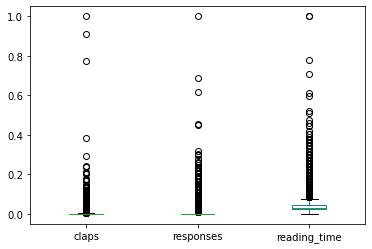

In [16]:
df = medium_data.select_dtypes(include="number")
normalized_df = (df-df.min())/(df.min()+df.max())
normalized_df.plot.box();

Nhìn chung, các cột có phân phối lệch về phía bên trái (về phía 0) nhiều.

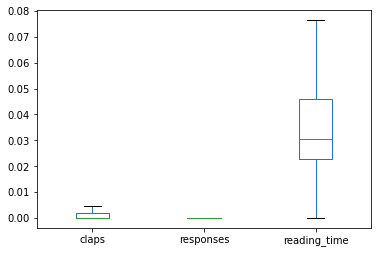

In [17]:
normalized_df.plot.box(showfliers=False);

So với hai cột còn lại, `reading_time` có vẻ có phân phối gần với phân phối chuẩn hơn. (Trường hợp bỏ qua các phần tử ngoại lai - outlier - được xác định nhờ boxplot).

### Xem phân bố của cột `claps`

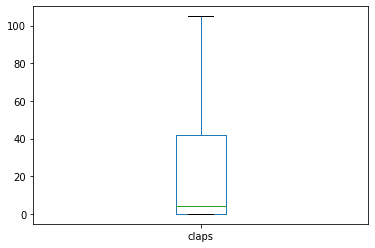

In [18]:
medium_data.claps.plot.box(showfliers=False);

Bỏ qua các giá trị ngoại lai, kết luận ban đầu rằng dữ liệu bị lệch, mỗi bài viết có lượt `claps` phổ biến trong khoảng 0 đến 40.

### Xem phân bố của cột `responses`

In [19]:
medium_data.loc[:, "responses"].describe()

count    47659.000000
mean         0.243270
std          1.506261
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        125.000000
Name: responses, dtype: float64

Có đến khoảng 70% dữ liệu bằng 0, giá trị cao nhất là 125. 

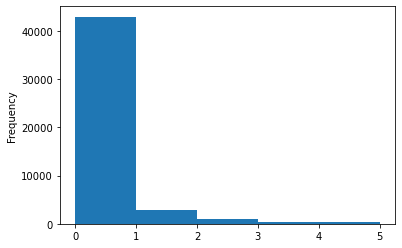

In [20]:
medium_data.loc[:, "responses"].plot.hist(bins=[0, 1, 2, 3, 4, 5]);

Xét các dữ liệu có `responses` gần với 0, ta có thể thấy dữ liệu nhận giá trị 0 vượt trội hơn. Kết luận ban đầu là `responses` có phân phối lệch, phần lớn các record có số lượng `responses` bằng 0.

### Xem phân bố của cột `reading_time`

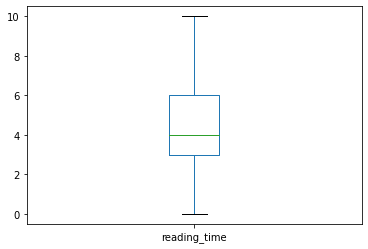

In [21]:
numeric_df["reading_time"].plot.box(showfliers=False);

Trường hợp bỏ qua các phần từ ngoại lại (outlier), phân bố của cột `reading_time` với các giá trị còn lại khá chuẩn. Ta có thể có được kết luận ban đầu rằng tập dữ liệu có thời gian đọc trung bình là khoảng 4 phút, Range của thời gian đọc là từ 3 phút đến 6 phút.

### Xem phân bố dữ liệu giữa các `tag`

Đầu tiên, em tiến hành gom dữ liệu theo các `tag`, sau đó sử dụng hàm count() theo `url` đế đến số lượng trong tag đó. Lý do chọn `url` là vì tất cả các đường dẫn đều là duy nhất. việc trùng lặp đã được xử lý ở bên trên.

In [24]:
count_tag_df = medium_data.groupby(["tag"])['url'].count()
count_tag_df

tag
Analytics                  2412
Artificial Inteligence    10160
Big Data                   2251
Data                       6703
Data Science              11414
Deep Learning              3972
Machine Learning          10747
Name: url, dtype: int64

Kế tiếp, em vẽ biểu đồ pie theo từng `tag`.

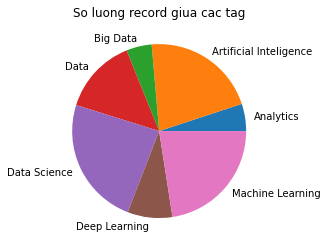

In [25]:
count_tag_df.plot.pie(
    ylabel="", 
    title="So luong record giua cac tag");

Từ đây ta có kết luận rằng, tập dữ liệu chứa nhiều bài viết nằm trong ba lĩnh vực chính là **"Data Science"**, **"Artificial Inteligence"**, **"Machine Learning"**.

# Đặt câu hỏi

Yêu cầu:
- Câu hỏi là gì? Cần có ý nghĩa?
- Nếu trả lời được câu hỏi thì sẽ có lợi ích gì?
- Không nên quá dễ để trả lời?


Với mỗi câu hỏi:
- Cần có tiền xử lý dữ liệu không? Và nếu có thì nhóm bạn xử lý như thế nào? (Gồm text mô tả và code bên dưới)
- Nhóm bạn phân tích dữ liệu như thế nào để ra được câu trả lời cho câu hỏi? (text và code)

## Tổng hợp những bài viết của TOP-3 tác giả nổi bật trong lĩnh vực *Data Science* có lượt `claps` cao  mà có tổng thời gian đọc không quá 30 phút?

Ý nghĩa:
- Medium được xem là trang tin tức, bài viết chất lượng dành cho mọi đối tượng, đặc biệt là những người quan tâm đến nhóm ngành CNTT. Medium cung cấp sẵn thời gian đọc ngay đầu bài viết.
- Trong một ngày, nhiều người sắp xếp thời gian chặt chẽ, rõ ràng. Họ thường dành thời gian cụ thể cho một công việc cụ thể.
- Câu hỏi trên trả lời cho vấn đề dựa vào tổng thời gian mà bạn dành cho việc đọc mỗi ngày và lĩnh vực mà bạn đang quan tâm, câu trả lời sẽ gợi ý cho bạn về những bài viết của các tác giả nổi bật trong lĩnh vực đó, chọn ra những bài có lượt `claps` cao nằm trong tổng thời gian phù hợp và sẵn sàng cho bạn truy cập vào ngay bài viết.

Câu hỏi trên được chia ra làm các câu hỏi nhỏ như sau:
- TOP-3 tác giả nổi bật nhất trong từng lĩnh vực Data Science là ai?
- Những bài viết nào của họ có lượt `claps` cao?
- Tổng hợp những bài viết có tổng thời gian đọc không quá 30 phút?

Tùy nhu cầu mỗi người, ở đây em dành `reading_time_total`: 30 phút tổng thời gian dành cho việc đọc Medium mỗi ngày và lĩnh vực mình chọn đọc hôm nay là `choosing_tagged `: Data Science. `TOP_author` là con số mà mình muốn lựa chọn số tác giả nổi bật nhất trong lĩnh vực tương ứng, giới hạn của bài này những người nổi bật được xem là những người đóng góp nhiều cho lĩnh vực, có nhiều bài viết trong lĩnh vực đó. Ở đây cần trả lời cho TOP-3 tác giả, vậy nên `TOP-author`: 3.

In [26]:
reading_time_total = 30
choosing_tagged = "Data Science"
TOP_author = 3

`is_true_tag` là một Series True/False để xác định bài viết đó có thuộc lĩnh vực mà ta quan tâm hay không. `author_df`, `author_count` lần lượt là DataFrame của `author` và đếm số lần xuất hiện của nó. Dòng dưới cùng in ra một array những tác giả thuộc TOP-3 trong lĩnh vực này.

In [27]:
is_true_tag = medium_data["tag"] == choosing_tagged

author_df, author_count = np.unique(
    medium_data[is_true_tag]["author"], 
    return_counts=True)
author_count_index = author_count.argsort(kind="stable")
author_df[author_count_index[-TOP_author:]]

array(['ODSC', 'preettheman', 'kaabar-sofien'], dtype=object)

Như vậy, ta có được những cái tên tác giả nổi bật là: **'ODSC'**, **'preettheman'** và **'kaabar-sofien'**. Tiếp theo, cùng xem số lượng bài viết trong lĩnh vực trên của từng tác giả.

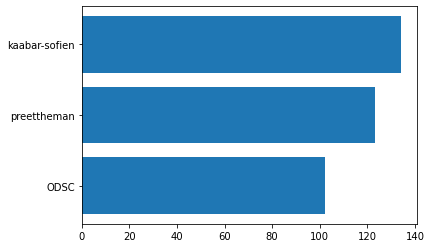

In [28]:
plt.barh(author_df[author_count_index[-TOP_author:]], 
         author_count[author_count_index[-TOP_author:]])

plt.show();

Kế tiếp, `is_true_author` là một Series True/False để đánh dấu các record có tác giả nằm trong TOP-3 bên trên. `top_author_df` là một DataFrame tổng hợp lại các record có các tác giả nằm trong TOP-3 và thuộc lĩnh vực đang quan tâm. Ngoài ra, DataFrame này còn được sort lại theo giá trị nằm trong thuộc tính `claps` với `accending`: False.

In [29]:
is_true_author = medium_data["author"].isin(
    ['ODSC', 'preettheman', 'kaabar-sofien']
)

top_author_df = medium_data[is_true_author & is_true_tag].sort_values(
    by="claps", 
    ascending=False
)

top_author_df.head()

,url,title,author,author_page,subtitle,claps,responses,reading_time,tag,date
8018,https://medium.com/@preettheman/these-are-the-programming-languages-google-uses-e248a03a589d,These are the programming languages Google uses,preettheman,https://medium.com/@preettheman,NaN,344.0,0.0,4.0,Data Science,2021-04-13
11589,https://medium.com/geekculture/using-time-to-generate-trading-signals-detecting-trend-exhaustions-d94cd218e124,Using Time to Generate Trading Signals. Detecting Trend Exhaustion.,kaabar-sofien,https://medium.com/@kaabar-sofien,Creating the Time Spent…,237.0,2.0,8.0,Data Science,2021-05-19
26931,https://medium.com/@preettheman/dont-use-golang-use-this-instead-3002e2e88368,"Don’t use Golang, use this instead!",preettheman,https://medium.com/@preettheman,NaN,153.0,0.0,3.0,Data Science,2021-10-17
25040,https://medium.com/@preettheman/these-are-all-of-the-algorithms-for-python-9b8fb21394cb,These are all of the algorithms for Python,preettheman,https://medium.com/@preettheman,NaN,147.0,0.0,2.0,Data Science,2021-10-10
21668,https://medium.com/@preettheman/jupyterlab-just-got-a-massive-update-8697cf7eb67b,JupyterLab just got a massive update!,preettheman,https://medium.com/@preettheman,NaN,147.0,0.0,3.0,Data Science,2021-09-22


Như vậy, từ DataFrame trên ta có được các bài viết của các tác giả hàng đầu, lượt `clap` được sắp xếp từ cao đến thấp. Công việc còn lại là tìm ra những bài viết có tổng thời gian nằm trong khoảng 30 phút. Phần này, em chưa tìm ra cách nào để tránh phải sử dụng vòng lặp **for**, nhằm mục đích tối ưu thời gian. Trước khi nhanh thì phải đúng, em xây dựng hàm `subset_time_by_sum` nhận hai giá trị **INPUT** là `column` là một cột của pandas và `target` là con số tổng thời gian; **OUTPUT** của hàm này là một list gồm các **index** của những column có tổng nằm trong khoảng của `target`.

In [30]:
def subset_time_by_sum(colum, target):
    """
    parameter:
    - column: (Series) A colums in pandas (have index).
    - target: (Int) Given a sum.
    
    return:
    - (list) index column of all subset which have total time equal sum.
    """
    sum_time = 0
    i = 0
    result = []
    
    for i in colum.index:
        if sum_time == target: break
        if (sum_time+colum[i]) < target:
            sum_time+=colum[i]
            result.append(i)
    return result

Dựa vào index trả về từ hàm `subset_time_by_sum`, ta lấy ra các record từ `top_author_df` và lưu lại những bài viết chuẩn bị để đọc vào DataFrame `reading_post_df`.

In [31]:
reading_post_df = medium_data.iloc[subset_time_by_sum(
    top_author_df.reading_time, reading_time_total)]
reading_post_df

,url,title,author,author_page,subtitle,claps,responses,reading_time,tag,date
8018,https://medium.com/@preettheman/these-are-the-programming-languages-google-uses-e248a03a589d,These are the programming languages Google uses,preettheman,https://medium.com/@preettheman,NaN,344.0,0.0,4.0,Data Science,2021-04-13
11589,https://medium.com/geekculture/using-time-to-generate-trading-signals-detecting-trend-exhaustions-d94cd218e124,Using Time to Generate Trading Signals. Detecting Trend Exhaustion.,kaabar-sofien,https://medium.com/@kaabar-sofien,Creating the Time Spent…,237.0,2.0,8.0,Data Science,2021-05-19
26932,https://towardsdatascience.com/a-pyspark-example-for-dealing-with-larger-than-memory-datasets-70dbc82b0e98,A PySpark Example for Dealing with Larger than Memory Datasets,georgiadeaconu,https://towardsdatascience.com/@georgiadeaconu,A step-by-step tutorial on how to use…,90.0,0.0,3.0,Data Science,2021-10-17
25040,https://medium.com/@preettheman/these-are-all-of-the-algorithms-for-python-9b8fb21394cb,These are all of the algorithms for Python,preettheman,https://medium.com/@preettheman,NaN,147.0,0.0,2.0,Data Science,2021-10-10
21668,https://medium.com/@preettheman/jupyterlab-just-got-a-massive-update-8697cf7eb67b,JupyterLab just got a massive update!,preettheman,https://medium.com/@preettheman,NaN,147.0,0.0,3.0,Data Science,2021-09-22
27817,https://python.plainenglish.io/named-entity-recognition-with-spacy-and-nltk-aaf6be517ad7,Named Entity Recognition with spaCy and NLTK,mayank.bali,https://python.plainenglish.io/@mayank.bali,A guide on using NLTK and spaCy to create a named entity…,256.0,0.0,6.0,Data Science,2021-10-20
30900,https://towardsdatascience.com/infranodus-excellent-tool-for-textual-data-analysis-2b4839e6cd10,InfraNodus: An Excellent Tool for Textual Data Analysis,petrkorab,https://towardsdatascience.com/@petrkorab,Introduction to InfraNodus with example of…,104.0,1.0,3.0,Data Science,2021-10-31


In [32]:
reading_post_df.reading_time.sum()

29.0

Kiểm tra lại xem tổng thời gian để đọc hết những bài viết này là 29 phút (<=30 phút) là đúng theo yêu cầu. Như vậy, những bài viết trên trả lời cho câu hỏi đặt ở đầu bài. Mời thầy và các bạn cùng xem các bài viết này.

In [33]:
reading_post_df.url

8018                       https://medium.com/@preettheman/these-are-the-programming-languages-google-uses-e248a03a589d
11589    https://medium.com/geekculture/using-time-to-generate-trading-signals-detecting-trend-exhaustions-d94cd218e124
26932        https://towardsdatascience.com/a-pyspark-example-for-dealing-with-larger-than-memory-datasets-70dbc82b0e98
25040                           https://medium.com/@preettheman/these-are-all-of-the-algorithms-for-python-9b8fb21394cb
21668                                 https://medium.com/@preettheman/jupyterlab-just-got-a-massive-update-8697cf7eb67b
27817                          https://python.plainenglish.io/named-entity-recognition-with-spacy-and-nltk-aaf6be517ad7
30900                   https://towardsdatascience.com/infranodus-excellent-tool-for-textual-data-analysis-2b4839e6cd10
Name: url, dtype: object

## Số lượng lượt claps của những bài viết thay đổi như thế nào tính theo từng tháng?

In [34]:
medium_data["month"] = medium_data.date.dt.month

In [35]:
new_df = medium_data.groupby(
    ["month"]
)[["claps", "responses"]].sum()

new_df

,claps,responses
month,,
1,168447.0,743.0
2,81949.0,371.0
3,106506.0,503.0
4,162322.0,797.0
5,187576.0,981.0
6,178058.0,673.0
7,85355.0,412.0
8,145680.0,895.0
9,167276.0,793.0


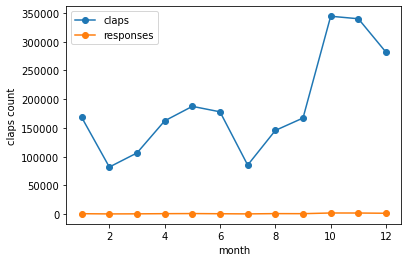

In [36]:
new_df.plot.line(marker='o',
                 xlabel="month", 
                 ylabel="claps count", 
                 legend=True);

In [37]:
new_df = medium_data.groupby(
    ["month"]
)[["claps", "reading_time"]].sum()

new_df

,claps,reading_time
month,,
1,168447.0,17657.0
2,81949.0,7794.0
3,106506.0,11695.0
4,162322.0,15696.0
5,187576.0,16706.0
6,178058.0,12521.0
7,85355.0,9840.0
8,145680.0,14031.0
9,167276.0,17994.0


## Câu hỏi số 2: (Thawms)

- Mô tả chi tiết:
- Ý nghĩa của câu hỏi:

# Nhìn lại quá trình làm đồ án:

- Mỗi thành viên đã gặp những khó khăn gì?
- Mồi thành viên học được gì hữu ích.
- Nhóm: Nếu có thêm thời gian thì sẽ làm gì?

Hau

Tham

Nhóm:

# Tài liệu tham khảo:

- Tài liệu môn học
- Dataset: [Medium 2021 data science articles dataset](https://www.kaggle.com/viniciuslambert/medium-2021-data-science-articles-dataset), Vinicius Lambert.